## Module Name: Recommendation systems
### Name: Priyanka Balakrishna Hejmadi

PROJECT OBJECTIVE: We will build a recommendation system using popularity based and collaborative filtering methods to recommend
mobile phones to a user which are most popular and personalised respectively.

#### 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps. [15 Marks]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
# A. Merge all the provided CSVs into one dataFrame. [2 Marks]
df1 = pd.read_csv("phone_user_review_file_1.csv")
df2 = pd.read_csv("phone_user_review_file_2.csv")
df3 = pd.read_csv("phone_user_review_file_3.csv")
df4 = pd.read_csv("phone_user_review_file_4.csv")
df5 = pd.read_csv("phone_user_review_file_5.csv")

In [3]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(374910, 11)
(114925, 11)
(312961, 11)
(98284, 11)
(350216, 11)


In [4]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)
print(df5.columns)

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')
Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')
Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')
Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')
Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')


All the dataframes have the same columns so we append them one after the other.

In [5]:
frames = [df1, df2, df3, df4, df5]
df = pd.concat(frames)
df.shape

(1251296, 11)

In [6]:
# B. Explore, understand the Data and share at least 2 observations. [2 Marks]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251296 entries, 0 to 350215
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1251296 non-null  object 
 1   date       1251296 non-null  object 
 2   lang       1251296 non-null  object 
 3   country    1251296 non-null  object 
 4   source     1251296 non-null  object 
 5   domain     1251296 non-null  object 
 6   score      1199479 non-null  float64
 7   score_max  1199479 non-null  float64
 8   extract    1234823 non-null  object 
 9   author     1201151 non-null  object 
 10  product    1251295 non-null  object 
dtypes: float64(2), object(9)
memory usage: 114.6+ MB


The dataset has 2 numerical variables and the  rest of them are categorical. 

In [7]:
df.describe()

,score,score_max
count,1.199479e+06,1199479.0
mean,8.050337e+00,10.0
std,2.622776e+00,0.0
min,2.000000e-01,10.0
25%,8.000000e+00,10.0
50%,1.000000e+01,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


The score_max variable has  a few missing values and is otherwise constant. It does not provide any useful information and can be dropped.

In [8]:
for feature in df.columns:
    print(feature, ":" ,df[feature].nunique())

phone_url : 3198
date : 5762
lang : 21
country : 41
source : 318
domain : 370
score : 83
score_max : 1
extract : 1166393
author : 705368
product : 52239


The authors of the reviews come from 41 countries and have  given the reviews in 21 languages. 

In [9]:
# C. Round off scores to the nearest integers. [3 Marks]
df = df.round(0)

In [10]:
# D. Check for missing values. Impute the missing values, if any. [2 Marks]
df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        51817
score_max    51817
extract      16473
author       50145
product          1
dtype: int64

In [11]:
df.dropna(inplace=True) # We drop the missing values.

In [12]:
df.isnull().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [13]:
df.shape

(1138675, 11)

In [14]:
# E. Check for duplicate values and remove them, if any. [2 Marks]
df.duplicated(keep='first').sum()

4182

In [15]:
df.drop_duplicates(keep='first', inplace=True)

In [16]:
df.shape

(1134493, 11)

In [17]:
# F. Keep only 1 Million data samples. Use random state=612. [2 Marks]
df = df.sample(1000000, random_state =612)

In [18]:
df.shape

(1000000, 11)

In [19]:
df.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [20]:
# G. Drop irrelevant features. Keep features like Author, Product, and Score. [2 Marks]
df.drop(['phone_url', 'date', 'lang', 'country', 'source', 'domain','score_max','extract'], axis=1, inplace=True)
df.head()

,score,author,product
3615,10.0,inffomaster1976@gmail.com,"Smartphone Nokia Lumia 630 Dual, 3G TV Digital..."
43477,9.0,PriscillaFleur,Sony Xperia Z3 Compact oranje / 16 GB - Overzicht
34348,9.0,jos,Samsung Galaxy S7 zwart / 32 GB
93259,10.0,Amazon Customer,"Motorola Nexus 6 Unlocked Smartphone, 32 GB, U..."
205718,10.0,Amazon Customer,"LG Electronics Nexus 5X Unlocked Smart Phone, ..."


#### 2. Answer the following questions. [10 Marks]

In [21]:
# A. Identify the most rated products. [3 Marks]
df['product'].value_counts()

Lenovo Vibe K4 Note (White,16GB)                                                                                                                                   4596
Lenovo Vibe K4 Note (Black, 16GB)                                                                                                                                  3885
OnePlus 3 (Graphite, 64 GB)                                                                                                                                        3596
OnePlus 3 (Soft Gold, 64 GB)                                                                                                                                       3124
Huawei P8lite zwart / 16 GB                                                                                                                                        2367
                                                                                                                                                                

In [22]:
df['score'].value_counts()

10.0    508815
8.0     218970
2.0      99487
6.0      82252
4.0      51648
9.0      28864
7.0       5297
5.0       2181
1.0       1317
3.0       1153
0.0         16
Name: score, dtype: int64

##### Lenovo Vibe K4 Note (White,16GB) is the most rated product. It has been rated 4596 times.

In [23]:
# B. Identify the users with most number of reviews. [3 Marks]
df['author'].value_counts()

Amazon Customer      66868
Cliente Amazon       16898
e-bit                 7389
Client d'Amazon       6766
Amazon Kunde          4060
                     ...  
mihaglazkov              1
nripen baskey            1
Электрический пес        1
Elisa Romano             1
Brittanix                1
Name: author, Length: 608588, dtype: int64

Amazon customers gave  the most reviews. 

In [24]:
# C. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the finaldataset. [4 Marks]
x = df['author'].value_counts() > 50
z = df['product'].value_counts() > 50
y = x[x].index
w = z[z].index
print("Users who have given more than 50 ratings:",y.shape)
print("Products that have more than 50 reviews",w.shape)
new_df= df[df['author'].isin(y) & df['product'].isin(w)]
print("The shape of the final dataset is:", new_df.shape)

Users who have given more than 50 ratings: (666,)
Products that have more than 50 reviews (4678,)
The shape of the final dataset is: (129810, 3)


In [25]:
new_df['product'] = new_df['product'].apply(str.lower)

C:\Users\priya\AppData\Local\Temp/ipykernel_4764/3651634786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['product'] = new_df['product'].apply(str.lower)


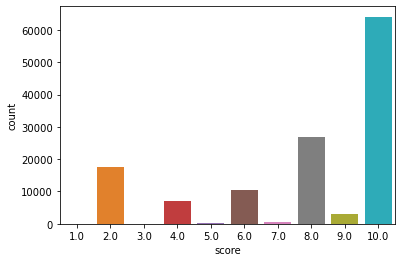

In [26]:
sns.countplot(data=new_df , x='score')
plt.show()

In [27]:
new_df[new_df['product']=='blackberry dtek50 unlocked smartphone, black'].count()

score      23
author     23
product    23
dtype: int64

#### 3. Build a popularity based model and recommend top 5 mobile phones. [5 Marks]

In [28]:
new_df.groupby('product')['score'].count().sort_values(ascending=False).head(5) 

product
lenovo vibe k4 note (white,16gb)       2752
lenovo vibe k4 note (black, 16gb)      2285
oneplus 3 (graphite, 64 gb)            1675
oneplus 3 (soft gold, 64 gb)           1578
lenovo vibe k5 (gold, volte update)    1421
Name: score, dtype: int64

In [29]:
new_df.groupby('product')['score'].mean().sort_values(ascending=False).head(5)  

product
טלפון סלולרי xiaomi redmi note 4 64gb    10.0
samsung galaxy s ii gt-i9100             10.0
sony ericsson c903                       10.0
motorola moto x                          10.0
motorola moto z force droid              10.0
Name: score, dtype: float64

In [30]:
ratings_mean_count = pd.DataFrame(new_df.groupby('product')['score'].mean().sort_values(ascending=False)) 

In [31]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('product')['score'].count())

In [32]:
ratings_mean_count.head()  

,score,rating_counts
product,,
טלפון סלולרי xiaomi redmi note 4 64gb,10.0,2
samsung galaxy s ii gt-i9100,10.0,2
sony ericsson c903,10.0,1
motorola moto x,10.0,3
motorola moto z force droid,10.0,1


In [33]:
new_df['score'] = new_df['score'].astype(int)

C:\Users\priya\AppData\Local\Temp/ipykernel_4764/945526029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['score'] = new_df['score'].astype(int)


In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129810 entries, 93259 to 39452
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   score    129810 non-null  int32 
 1   author   129810 non-null  object
 2   product  129810 non-null  object
dtypes: int32(1), object(2)
memory usage: 7.5+ MB


In [35]:
new_df['score'].unique()

array([10,  6,  2,  8,  4,  9,  7,  3,  5,  1])

#### 4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model. [10 Marks]

In [36]:
from surprise import Dataset,Reader
from surprise.model_selection import train_test_split

from surprise import KNNWithMeans
from surprise import accuracy

from surprise import SVD
from surprise import accuracy

In [37]:
reader = Reader(rating_scale=(1,10))

surp_data=Dataset.load_from_df(new_df[['author','product','score']],reader)
surp_data.df.head()

,author,product,score
93259,Amazon Customer,"motorola nexus 6 unlocked smartphone, 32 gb, u...",10
21362,Amazon Customer,"lenovo vibe k5 (grey, volte update)",6
53900,Amazon Customer,"lenovo vibe k4 note (white,16gb)",2
11426,Amazon Customer,samsung galaxy s7 edge g935fd dual sim interna...,10
54259,Amazon Customer,"lenovo vibe k4 note (black, 16gb)",8


In [38]:
trainset,testset =train_test_split(surp_data, test_size=0.3,random_state=23)

In [39]:
user_ratings=trainset.ur
type(user_ratings)

collections.defaultdict

In [40]:
model_svd = SVD()
model_svd.fit(trainset)

In [41]:
test_pred= model_svd.test(testset)

In [42]:
test_pred[0]

Prediction(uid='Amazon Customer', iid='samsung galaxy s4, black mist 16gb (verizon wireless)', r_ui=10.0, est=4.353595590730874, details={'was_impossible': False})

In [43]:
# 5. Evaluate the collaborative model. Print RMSE value. [2 Marks]
accuracy.rmse(test_pred, verbose=True)

RMSE: 2.7438


2.7438487452207125

In [44]:
testset[0]

('Amazon Customer',
 'samsung galaxy s4, black mist 16gb (verizon wireless)',
 10.0)

In [45]:
# KNNWithMeans Item-Item collaborative filtering
model_item = KNNWithMeans(k=20, sim_options={'name': 'cosine', 'user_based': False})
model_item.fit(trainset)

item_pred=model_item.test(testset)

item_pred[0]

Computing the cosine similarity matrix...
Done computing similarity matrix.


Prediction(uid='Amazon Customer', iid='samsung galaxy s4, black mist 16gb (verizon wireless)', r_ui=10.0, est=7.2, details={'actual_k': 20, 'was_impossible': False})

In [46]:
accuracy.rmse(item_pred, verbose=True)

RMSE: 2.7560


2.7560096486202705

In [47]:
# KNNWithMeans User-user collaborative filtering
model_user = KNNWithMeans(k=20, sim_options={'name': 'cosine', 'user_based': True})
model_user.fit(trainset)

user_pred=model_user.test(testset)

user_pred[0]

Computing the cosine similarity matrix...
Done computing similarity matrix.


Prediction(uid='Amazon Customer', iid='samsung galaxy s4, black mist 16gb (verizon wireless)', r_ui=10.0, est=7.2, details={'actual_k': 20, 'was_impossible': False})

In [48]:
accuracy.rmse(user_pred, verbose=True)

RMSE: 2.7440


2.7439753030713407

In [49]:
#6. Predict score (average rating) for test users. [2 Marks]
uid = 'Amazon Customer'
iid = 'huawei p8 lite wit / 16 gb'
pred = model_svd.predict(uid, iid, verbose=True)

user: Amazon Customer item: huawei p8 lite wit / 16 gb r_ui = None   est = 7.44   {'was_impossible': False}


##### 7. Report your findings and inferences. [2 Marks]
The performance all all three models is very similar. All give an RMSE value of around 2.7. 

In [50]:
# 8. Try and recommend top 5 products for test users. [5 Marks]
from collections import defaultdict
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, r_ui, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [51]:
top_n = get_top_n(user_pred, n=5)

In [52]:
top_n['Samantha']

[('samsung e1270 uk sim free mobile phone - white', 9.710932715373122),
 ('tracfone lg tracfone 306g no contract, 2.0 megapixel camera, 3.2-inch screen, black, retail packaging',
  9.176120748175357),
 ('lenovo motorola moto g smartphone, display hd 4,5", processore qualcomm, memoria 8 gb, microsim, android 4.4 os, fotocamera da 5 mp, nero [germania]',
  9.161261435720526),
 ('tech armor samsung galaxy s3 s iii premium anti-glare & anti-fingerprint (matte) screen protectors with lifetime replacement warranty [3-pack] - retail packaging',
  9.144552162534874),
 ('huawei p8 lite wit / 16 gb', 9.065325033793696)]

In [53]:
# 9. Try other techniques (Example: cross validation) to get better results. [3 Marks]

from surprise.model_selection import GridSearchCV

param_grid = {
    "n_epochs": [10, 20],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.02]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], refit=True, cv=5)

gs.fit(surp_data)

training_parameters = gs.best_params["rmse"]

print("BEST RMSE: \t", gs.best_score["rmse"])
print("BEST MAE: \t", gs.best_score["mae"])
print("BEST params: \t", gs.best_params["rmse"])

BEST RMSE: 	 2.6629320933669125
BEST MAE: 	 2.126111740050985
BEST params: 	 {'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.02}


##### 10. In what business scenario you should use popularity based Recommendation Systems ? [2 Marks]

Popularity based recommendation systems are the most primitive type of recommendation systems. It is used to recommend products or services to new customers. A first time customer has no history with the system hence the system has no data about him/her. In such a scenario, it is better to recommend products which are popular among existing customers rather than giving no recommendation. 

For example, a new customer has logged on to Netflix. Since Netflix knows nothing about the customers preferences yet, it will show movies or TV shows which are 'trending' instead of showing a blank screen.

##### 11. In what business scenario you should use CF based Recommendation Systems ? [2 Marks]

Collaborative filtering should be used to get recommendations when we already have some data about the preferences of the customer and the nature of the products. Then we can find out if a user will like another product even if they have not rated it.

For example, an existing customer on Netflix likes many rom-com movies. It would be good to recommend similar rom-com movies to than user.

##### 12. What other possible methods can you think of which can further improve the recommendation for different users ? [2 Marks]

Different methods of recommending products can be combined to form hybrid systems. New users can be recommended using popularity based models and once they become regular customers use collaborative filtering. 
